<a href="https://colab.research.google.com/github/xxxnmxhj00/Pythorch/blob/main/%5Btorch_4%5D%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D_RNN%2C_LSTM%2C_GRU%2C_Bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # # Colab에 Mecab 설치
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 torchtext==0.6.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 784.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.0+cu121
    Uninstalling torch-2.4.0+cu121:
      Successfully uninstalled torch-2.4.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.0+cu121
    Uninstalling torchvision-0.19.0+cu121:
      Successfully uninstalled torchvision-0.19.0+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.4.0+cu121
    Uninstalling torchaudio-2.4.0+cu121:
      Successfully uninstalled torchaudio-2.4.0+cu121


In [ ]:
import re
import sys
import random

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchtext import data, datasets

## 데이터 다운로드

In [ ]:
# tokenize = Mecab()
# Data Setting
TEXT = data.Field(batch_first = True,
                  fix_length = 500,
                  tokenize = str.split,  # tokenize = Mecab()로 한국어 사용 가능
                  pad_token = '<pad>',
                  unk_token = '<unk>',
                  pad_first = True)

LABEL = data.LabelField(dtype=torch.float)

train_data, test_data = datasets.IMDB.splits(text_field = TEXT, label_field = LABEL)

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:08<00:00, 10.1MB/s]


- sequential : 시퀀스 데이터 여부. (True가 기본값)
- use_vocab : 단어 집합을 만들 것인지 여부. (True가 기본값)
- tokenize : 어떤 토큰화 함수를 사용할 것인지 지정. (string.split이 기본값)
- lower : 영어 데이터를 전부 소문자화한다. (False가 기본값)
- batch_first : 미니 배치 차원을 맨 앞으로 하여 데이터를 불러올 것인지 여부. (False가 기본값)
- is_target : 레이블 데이터 여부. (False가 기본값)
- fix_length : 최대 허용 길이. 이 길이에 맞춰서 패딩 작업(Padding)이 진행된다.

In [ ]:
print('train_data의 구성 요소 출력 : ', train_data.fields)

train_data의 구성 요소 출력 :  {'text': <torchtext.data.field.Field object at 0x7bb094085300>, 'label': <torchtext.data.field.LabelField object at 0x7bb094086110>}


In [ ]:
# Data Length
print(f'Train Data Length : {len(train_data.examples)}')
print(f'Test Data Length : {len(test_data.examples)}')

Train Data Length : 25000
Test Data Length : 25000


In [ ]:
print(vars(train_data[0]))

{'text': ['As', 'someone', 'who', 'has', 'seen', 'and', 'followed', "Hartley's", 'public', 'work', 'for', 'several', 'years', 'I', 'think', 'much', 'of', 'what', 'used', 'to', 'be', 'fiction', 'told', 'through', 'true', 'stories', 'has', 'been', 'elevated', 'into', 'obscure', 'philosophical', 'mind', 'games.<br', '/><br', '/>While', 'entertaining,', 'Fay', 'Grim', 'is', 'another', 'step', 'in', 'the', 'Henry', 'Fool', 'line', 'of', 'thinking,', 'where', 'the', 'movie', 'reflects', 'the', 'quality', 'of', 'an', 'object', 'within', 'the', 'movie', 'itself.', 'In', 'Henry', 'Fool,', 'the', 'object', 'is', 'the', 'memoirs...', 'In', 'Fay', 'Grim,', 'the', 'object', 'is', 'encrypted', 'memoirs', '-', 'which', 'are', 'themselves', 'stolen,', 'forged', 'and', 'trans-mutated', 'into', 'something', 'so', 'obscure', 'it', "can't", 'really', 'make', 'any', 'sense', '-', 'i.e.', 'the', 'process', 'of', 'script', 'writing', 'and', 'film-making', 'in', 'the', 'modern', 'era', '-', 'where', 'most', '

In [ ]:
'''python의 기본 내장함수로서 모듈, 클래스,
클래스 인스턴스 객체(__dict__속성을 가지는 객체)에
대해 __dict__ (dictionary 형태)로 return해 주는 함수임.'''
class SellList:
    snack = 1000
    ice_cream = 700
    coke = 1200
    candy = 1500

print(vars(SellList))

{'__module__': '__main__', 'snack': 1000, 'ice_cream': 700, 'coke': 1200, 'candy': 1500, '__dict__': <attribute '__dict__' of 'SellList' objects>, '__weakref__': <attribute '__weakref__' of 'SellList' objects>, '__doc__': None}


In [ ]:
# Data Sample
print('---- Data Sample ----')
print('Input : ')
print(' '.join(vars(train_data.examples[1])['text']),'\n')
# vars(): 사용된 클래스의 객체에 대한 dictionary 를 반환한다.
print('Label : ')
print(vars(train_data.examples[1])['label'])

---- Data Sample ----
Input : 
This is an almost action-less film following Jack, an insomniac, as he goes through hallucinations, is visited by dead friends, throws himself off a building, and, for a lot of the time, can't tell reality from hallucination.<br /><br />Dominic Monaghan, as Jack, is truly believable. Confused, and scared but lethargic and, at times blankly accepting of what he sees, we follow him trying to sort out what he's seeing and find a way to sleep.<br /><br />Introduce a talking dog (another hallucination) and children that suddenly appear in Jack's bathroom and bedroom without any explanation as to how they got there (more hallucination) and you have an interesting, mind boggling, 43 minutes And the shower scene is enough to get any Dom fan coming back for more. 

Label : 
pos


## 자연어 전처리

In [ ]:
def PreProcessingText(input_sentence):
    input_sentence = input_sentence.lower() # 소문자화
    input_sentence = re.sub('<[^>]*>', repl= ' ', string = input_sentence)
    # "<br />" 처리
    input_sentence = re.sub('[^a-z ]', repl= ' ', string = input_sentence)
    # 특수문자 처리 ("'" 제외)
    input_sentence = re.sub('\s+', repl= ' ', string = input_sentence)
    # 연속된 띄어쓰기 처리
    if input_sentence:
        return input_sentence

In [ ]:
for example in train_data.examples:
    vars(example)['text'] = PreProcessingText(' '.join(vars(example)['text'])).split()
for example in test_data.examples:
    vars(example)['text'] = PreProcessingText(' '.join(vars(example)['text'])).split()

In [ ]:
print(vars(train_data[1]))

{'text': ['this', 'is', 'an', 'almost', 'action', 'less', 'film', 'following', 'jack', 'an', 'insomniac', 'as', 'he', 'goes', 'through', 'hallucinations', 'is', 'visited', 'by', 'dead', 'friends', 'throws', 'himself', 'off', 'a', 'building', 'and', 'for', 'a', 'lot', 'of', 'the', 'time', 'can', 't', 'tell', 'reality', 'from', 'hallucination', 'dominic', 'monaghan', 'as', 'jack', 'is', 'truly', 'believable', 'confused', 'and', 'scared', 'but', 'lethargic', 'and', 'at', 'times', 'blankly', 'accepting', 'of', 'what', 'he', 'sees', 'we', 'follow', 'him', 'trying', 'to', 'sort', 'out', 'what', 'he', 's', 'seeing', 'and', 'find', 'a', 'way', 'to', 'sleep', 'introduce', 'a', 'talking', 'dog', 'another', 'hallucination', 'and', 'children', 'that', 'suddenly', 'appear', 'in', 'jack', 's', 'bathroom', 'and', 'bedroom', 'without', 'any', 'explanation', 'as', 'to', 'how', 'they', 'got', 'there', 'more', 'hallucination', 'and', 'you', 'have', 'an', 'interesting', 'mind', 'boggling', 'minutes', 'and

##  단어 집합 만들기

In [ ]:
# no pre-trained
TEXT.build_vocab(train_data,
                 min_freq = 2, # min_freq는 학습 데이터에서 최소 2번 이상 등장한 단어만을 단어 집합에 추가하겠다는 의미
                 max_size = None)

LABEL.build_vocab(train_data)
vocab_size = len(TEXT.vocab)
vocab_size

46333

In [ ]:
# Vocabulary Info
print(f'Vocab Size : {vocab_size}')
print('Vocab Examples : ')
for idx, (k, v) in enumerate(TEXT.vocab.stoi.items()):
    # stoi로 단어와 각 단어의 정수 인덱스가 저장되어져 있는 딕셔너리 객체에 접근
    if idx >= 10:
        break
    print('\t', k, v)
print('---------------------------------')
# Label Info
print(f'Label Size : {len(LABEL.vocab)}')
print('Lable Examples : ')
for idx, (k, v) in enumerate(LABEL.vocab.stoi.items()):
    print('\t', k, v)

Vocab Size : 46333
Vocab Examples : 
	 <unk> 0
	 <pad> 1
	 the 2
	 and 3
	 a 4
	 of 5
	 to 6
	 is 7
	 it 8
	 in 9
---------------------------------
Label Size : 2
Lable Examples : 
	 neg 0
	 pos 1


## 데이터 로더 만들기

In [ ]:
type(train_data)

torchtext.datasets.imdb.IMDB

In [ ]:
# Spliting Valid set
train_data, valid_data = train_data.split(split_ratio=0.8)

In [ ]:
batch_size = 32
'''토치텍스트는 모든 텍스트를 배치 처리하는 것을 지원하고, 단어를 인덱스 번호로 대체하는 BucketIterator를 제공합니다.
BucketIterator는 batch_size, device, shuffle 등의 인자를 받습니다'''
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(datasets=(train_data,valid_data,
                                                                                     test_data),
                                                                           batch_size=batch_size,
                                                                           device=device)

In [ ]:
print('훈련 데이터의 미니 배치의 개수 : {}'.format(len(train_iterator)))
print('테스트 데이터의 미니 배치의 개수 : {}'.format(len(test_iterator)))
print('검증 데이터의 미니 배치의 개수 : {}'.format(len(valid_iterator)))

훈련 데이터의 미니 배치의 개수 : 625
테스트 데이터의 미니 배치의 개수 : 782
검증 데이터의 미니 배치의 개수 : 157


In [ ]:
# Check batch data
sample_for_check = next(iter(train_iterator))
print(f'sample_for_check: {sample_for_check}')
print(f'TEXT:\n {sample_for_check.text}')
print(f'LABEL:\n {sample_for_check.label}')

sample_for_check: 
[torchtext.data.batch.Batch of size 32]
	[.text]:[torch.LongTensor of size 32x500]
	[.label]:[torch.FloatTensor of size 32]
TEXT:
 tensor([[    1,     1,     1,  ...,  2334,   175,   635],
        [ 1148,  2660, 42596,  ...,    68,    77,    56],
        [    1,     1,     1,  ...,     4,   439,  5251],
        ...,
        [    1,     1,     1,  ...,   117,   644,     0],
        [    1,     1,     1,  ...,    72,   119,  5812],
        [    1,     1,     1,  ...,   202,    39,   144]])
LABEL:
 tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.])


In [ ]:
batch_size = 32
# 배치 재로드
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    datasets=(train_data, valid_data, test_data),
    batch_size=batch_size,repeat=False, device=device)

## RNN

- input_size: Input의 사이즈에 해당 하는 수를 입력하면 됩니다.
- hidden_size: 은닉층의 사이즈에 해당 하는 수를 입력하면 됩니다.
- num_layers: RNN의 은닉층 레이어 갯수를 나타냅니다. 기본 값은 1입니다.
- nonlinearity: 비선형 활성화 함수를 선택합니다. tanh, relu중 하나를 선택 가능하며, 기본 값은 tanh입니다.
- bias: 바이어스 값 활성화 여부를 선택합니다. 기본 값은 True 입니다.
- batch_first: True일 시, Output 값의 사이즈는 (batch, seq, feature) 가 됩니다. 기본 값은 False 입니다.
- dropout: 드롭아웃 비율을 설정 합니다. 기본 값은 0입니다.
- bidirectional: True일 시, 양방향 RNN이 됩니다. 기본 값은 False 입니다.

In [ ]:
class RNN(nn.Module):
    def __init__(self, n_layers, hidden_dim, vocab_size, embed_dim, n_classes, dropout_p=0.2):
        super().__init__()
        self.emb = nn.Embedding(num_embeddings = vocab_size, embedding_dim = embed_dim)
        self.RNN = nn.RNN (input_size = embed_dim, hidden_size = hidden_dim,
                           num_layers = n_layers, dropout = dropout_p, batch_first = True)
        self.drop = nn.Dropout(dropout_p)
        self.fc = nn.Linear(hidden_dim, n_classes)

    def forward(self, x):
        emb = self.emb(x) # emb의 리턴값은 (배치 크기, 시퀀스 길이, 은닉 상태의 크기)
        # emb: torch.Size([32, 500, 300])
        output, hidden = self.RNN(emb) # RNN의 리턴값은 (배치 크기, 시퀀스 길이, 은닉 상태의 크기)
        # output: torch.Size([32, 500, 128])
        last_output = output[:,-1,:] # (배치 크기, 은닉 상태의 크기)의 텐서로 크기가 변경됨
        # 즉, 마지막 time-step의 은닉 상태만 가져온다.
        x = self.fc(self.drop(last_output))
        return x

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_fn = nn.BCEWithLogitsLoss().to(device)

def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum()/len(correct)
    return acc

### Train

In [ ]:
def train(model, iterator, optimizer, loss_fn, idx_epoch, batch_size):
    epoch_loss = 0
    epoch_acc = 0

    model.train()  # 학습모드로 변경
    batch_size = batch_size

    for idx, batch in enumerate(iterator):
        # Initializing
        optimizer.zero_grad()
        # Forward
        predictions = model(batch.text).squeeze()
        loss = loss_fn(predictions, batch.label)
        acc = binary_accuracy(predictions, batch.label)
        sys.stdout.write(
                    "\r" + f"[Train] Epoch : {idx_epoch:^3}"\
                    f"[{(idx + 1)*batch_size} / {len(iterator)*batch_size} \
                    ({100.*(idx + 1)/len(iterator):.4}%)]"\
                    f"  Loss: {loss.item():.4}"\
                    f"  Acc : {acc.item():.4}")
        # Backward
        loss.backward()
        optimizer.step()
        # Update Epoch Performance
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss/len(iterator) , epoch_acc/len(iterator)

### evaluate

In [ ]:
def evaluate(model, iterator, loss_fn):
    epoch_loss = 0
    epoch_acc = 0

    # evaluation mode
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            predictions = model(batch.text).squeeze(1)
            loss = loss_fn(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
hidden_dim = 128
vocab_size = len(TEXT.vocab)
embed_dim = 300
n_classes = 1
n_layers = 1
rnn_model = RNN(n_layers, hidden_dim, vocab_size, embed_dim, n_classes).to(device)
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [ ]:
N_EPOCH = 2
best_valid_loss = float('inf')

for epoch in range(N_EPOCH):
    train_loss, train_acc = train(rnn_model, train_iterator, optimizer, loss_fn, epoch, batch_size)
    valid_loss, valid_acc = evaluate(rnn_model, valid_iterator, loss_fn)
    print('')
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(rnn_model.state_dict(), f'./RNN_best.pth')
        print(f'\t Saved at {epoch}-epoch')

    print(f'\t Epoch : {epoch} | Train Loss : {train_loss:.4} | Train Acc : {train_acc:.4}')
    print(f'\t Epoch : {epoch} | Valid Loss : {valid_loss:.4} | Valid Acc : {valid_acc:.4}')

## LSTM

In [ ]:
batch_size = 32
# 배치 재로드
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    datasets=(train_data, valid_data, test_data),
    batch_size=batch_size,repeat=False, device=device)

In [ ]:
class LSTM(nn.Module):
    def __init__(self,n_layers, hidden_dim, vocab_size, embed_dim, n_classes, dropout_p=0.2):
        super().__init__()
        self.emb = nn.Embedding(num_embeddings = vocab_size, embedding_dim = embed_dim)
        self.LSTM = nn.LSTM(input_size = embed_dim, hidden_size = hidden_dim,
                           num_layers = n_layers, dropout = dropout_p,
                           batch_first = True)
        self.drop = nn.Dropout(dropout_p)
        self.fc = nn.Linear(hidden_dim, n_classes)

    def forward(self, x):
        emb = self.emb(x)
        # emb : (Batch_Size, Max_Seq_Length, Emb_dim)
        output, hidden = self.LSTM(emb)
        last_output = output[:,-1,:]
        # (배치 크기, 은닉 상태의 크기)의 텐서로 크기가 변경됨. 즉, 마지막 time-step의 은닉 상태만 가져온다.
        x = self.fc(self.drop(last_output))

        return x

In [ ]:
hidden_dim = 128
vocab_size = len(TEXT.vocab)
embed_dim = 300
n_classes = 1
n_layers = 1
LSTM_model = LSTM(n_layers, hidden_dim, vocab_size, embed_dim, n_classes).to(device)
optimizer = torch.optim.Adam(LSTM_model.parameters(), lr=0.001)

In [ ]:
N_EPOCH = 2

best_valid_loss = float('inf')

for epoch in range(N_EPOCH):
    train_loss, train_acc = train(LSTM_model, train_iterator, optimizer, loss_fn, epoch, batch_size)
    valid_loss, valid_acc = evaluate(LSTM_model, valid_iterator, loss_fn)
    print('')
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(LSTM_model.state_dict(), f'./LSTM_best.pt')
        print(f'\t Saved at {epoch}-epoch')

    print(f'\t Epoch : {epoch} | Train Loss : {train_loss:.4} | Train Acc : {train_acc:.4}')
    print(f'\t Epoch : {epoch} | Valid Loss : {valid_loss:.4} | Valid Acc : {valid_acc:.4}')

[Train] Epoch :  0 [20000 / 20000                     (100.0%)]  Loss: 0.5536  Acc : 0.625
	 Saved at 0-epoch
	 Epoch : 0 | Train Loss : 0.5932 | Train Acc : 0.6826
	 Epoch : 0 | Valid Loss : 0.5253 | Valid Acc : 0.7544
[Train] Epoch :  1 [20000 / 20000                     (100.0%)]  Loss: 0.4136  Acc : 0.75
	 Saved at 1-epoch
	 Epoch : 1 | Train Loss : 0.4793 | Train Acc : 0.7825
	 Epoch : 1 | Valid Loss : 0.4834 | Valid Acc : 0.7759


## GRU
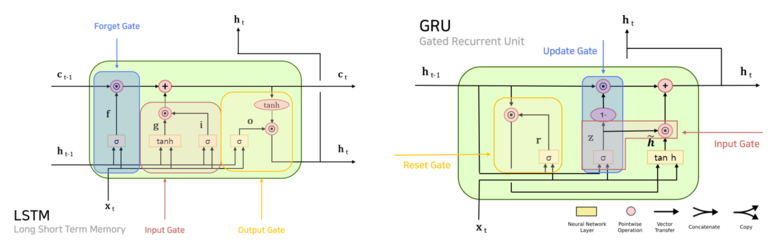

In [ ]:
batch_size = 32
# 배치 재로드
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    datasets=(train_data, valid_data, test_data),
    batch_size=batch_size,repeat=False, device=device)

In [ ]:
class GRU(nn.Module):
    def __init__(self,n_layers, hidden_dim, vocab_size, embed_dim, n_classes, dropout_p=0.2):
        super().__init__()
        self.emb = nn.Embedding(num_embeddings = vocab_size, embedding_dim = embed_dim)
        self.GRU = nn.GRU(input_size = embed_dim,
                           hidden_size = hidden_dim,
                           num_layers = n_layers,
                           dropout = dropout_p,
                           batch_first = True) #
        self.drop = nn.Dropout(dropout_p)
        self.fc = nn.Linear(hidden_dim, n_classes)

    def forward(self, x):
        emb = self.emb(x)
        # emb : (Batch_Size, Max_Seq_Length, Emb_dim)
        output, hidden = self.GRU(emb)
        last_output = output[:,-1,:]# (배치 크기, 은닉 상태의 크기)의 텐서로 크기가 변경됨. 즉, 마지막 time-step의 은닉 상태만 가져온다.
        x = self.fc(self.drop(last_output))

        return x

In [ ]:
GRU_model = GRU(n_layers, hidden_dim, vocab_size, embed_dim, n_classes).to(device)
optimizer = torch.optim.Adam(GRU_model.parameters(), lr=0.001)

In [ ]:
N_EPOCH = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCH):
    train_loss, train_acc = train(GRU_model, train_iterator, optimizer, loss_fn, epoch, batch_size)
    valid_loss, valid_acc = evaluate(GRU_model, valid_iterator, loss_fn)
    print('')
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(GRU_model.state_dict(), f'./gru_best.pt')
        print(f'\t Saved at {epoch}-epoch')

    print(f'\t Epoch : {epoch} | Train Loss : {train_loss:.4} | Train Acc : {train_acc:.4}')
    print(f'\t Epoch : {epoch} | Valid Loss : {valid_loss:.4} | Valid Acc : {valid_acc:.4}')

[Train] Epoch :  0 [20000 / 20000                     (100.0%)]  Loss: 0.5093  Acc : 0.8125
	 Saved at 0-epoch
	 Epoch : 0 | Train Loss : 0.6142 | Train Acc : 0.6518
	 Epoch : 0 | Valid Loss : 0.5276 | Valid Acc : 0.7418
[Train] Epoch :  1 [20000 / 20000                     (100.0%)]  Loss: 0.355  Acc : 0.8125
	 Saved at 1-epoch
	 Epoch : 1 | Train Loss : 0.5082 | Train Acc : 0.7491
	 Epoch : 1 | Valid Loss : 0.4641 | Valid Acc : 0.7992
[Train] Epoch :  2 [20000 / 20000                     (100.0%)]  Loss: 0.2292  Acc : 0.8438
	 Saved at 2-epoch
	 Epoch : 2 | Train Loss : 0.2726 | Train Acc : 0.8895
	 Epoch : 2 | Valid Loss : 0.3186 | Valid Acc : 0.8756
[Train] Epoch :  3 [20000 / 20000                     (100.0%)]  Loss: 0.06232  Acc : 1.0
	 Epoch : 3 | Train Loss : 0.1364 | Train Acc : 0.95
	 Epoch : 3 | Valid Loss : 0.3789 | Valid Acc : 0.8684
[Train] Epoch :  4 [20000 / 20000                     (100.0%)]  Loss: 0.02011  Acc : 1.0
	 Epoch : 4 | Train Loss : 0.06029 | Train Acc : 0

## Bi-LSTM
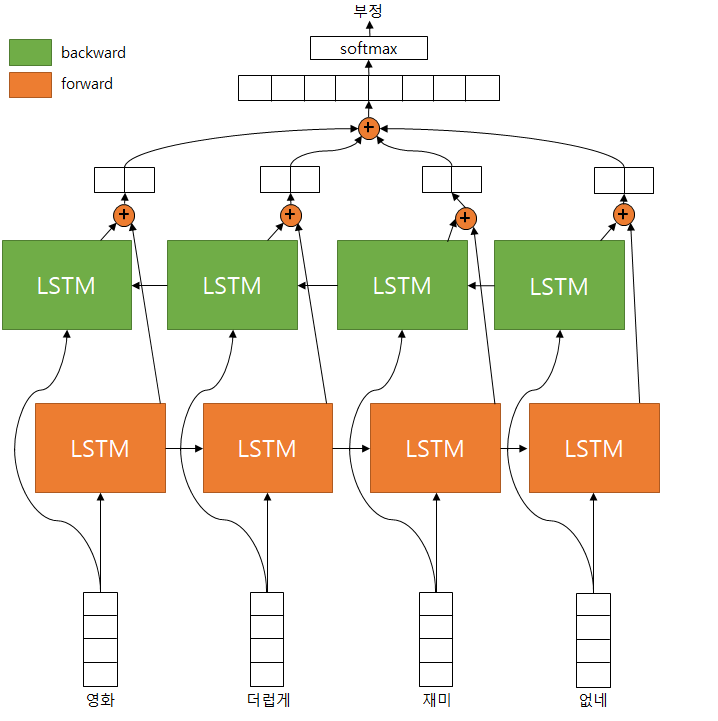

- 그림을 보면 주황색 블록의 forward 정방향 LSTM이 있고 초록색 블록의 backward 역방향 LSTM이 있다.
- Forward State만 사용되는 기존의 LSTM에서 Backward까지 같이 사용하여 (Hidden State가 Concat되어 사용된다.)
- t-1만 보는게 아니라 t+1로부터도 확인해서 output을 결정해주자는 이론이다. (return_states를 찍어보면 backward, forward의 각각 의 hidden,cell state가 나온다.)
- 대부분의 다른 time-forecasting이나, 문자열 학습등에서 일반 lstm보다 bi-lstm을 사용하면 조금 더 좋아진다 라고 한다.

In [ ]:
batch_size = 30
# 배치 재로드
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    datasets=(train_data, valid_data, test_data),
    batch_size=batch_size,repeat=False, device=device)

In [ ]:
class bi_LSTM(nn.Module):
    def __init__(self,n_layers, hidden_dim, vocab_size, embed_dim, n_classes, dropout_p=0.2):
        super().__init__()
        self.emb = nn.Embedding(num_embeddings = vocab_size, embedding_dim = embed_dim)
        self.LSTM = nn.LSTM (input_size = embed_dim,
                           hidden_size = hidden_dim,
                           num_layers = n_layers,
                           dropout = dropout_p,
                           bidirectional = True,
                           batch_first = True) #
        self.drop = nn.Dropout(dropout_p)
        self.fc = nn.Linear(hidden_dim * 2, n_classes)

    def forward(self, x):
        emb = self.emb(x)
        # emb : (Batch_Size, Max_Seq_Length, Emb_dim)
        output, hidden = self.LSTM(emb)
        last_output = output[:,-1,:]# (배치 크기, 은닉 상태의 크기)의 텐서로 크기가 변경됨. 즉, 마지막 time-step의 은닉 상태만 가져온다.
        x = self.fc(self.drop(last_output))

        return x

In [ ]:
bi_LSTM_model = bi_LSTM(n_layers, hidden_dim, vocab_size, embed_dim, n_classes).to(device)
optimizer = torch.optim.Adam(bi_LSTM_model.parameters(), lr=0.001)

In [ ]:
N_EPOCH = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCH):
    train_loss, train_acc = train(bi_LSTM_model, train_iterator, optimizer, loss_fn, epoch, batch_size)
    valid_loss, valid_acc = evaluate(bi_LSTM_model, valid_iterator, loss_fn)
    print('')
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(bi_LSTM_model.state_dict(), f'./bi_LSTM_best.pt')
        print(f'\t Saved at {epoch}-epoch')

    print(f'\t Epoch : {epoch} | Train Loss : {train_loss:.4} | Train Acc : {train_acc:.4}')
    print(f'\t Epoch : {epoch} | Valid Loss : {valid_loss:.4} | Valid Acc : {valid_acc:.4}')

[Train] Epoch :  0 [20010 / 20010                     (100.0%)]  Loss: 0.4661  Acc : 0.8333
	 Saved at 0-epoch
	 Epoch : 0 | Train Loss : 0.5956 | Train Acc : 0.6728
	 Epoch : 0 | Valid Loss : 0.5228 | Valid Acc : 0.7491
[Train] Epoch :  1 [20010 / 20010                     (100.0%)]  Loss: 0.3696  Acc : 0.8333
	 Epoch : 1 | Train Loss : 0.4745 | Train Acc : 0.7824
	 Epoch : 1 | Valid Loss : 0.5356 | Valid Acc : 0.728
[Train] Epoch :  2 [5130 / 20010                     (25.64%)]  Loss: 0.5637  Acc : 0.8

In [ ]:
aa = [
    [[1,2,3],
    [1,2,4],
     [5,6,7]],

    [[4,5,6],
    [7,8,9],
     [3,6,8]],

    [[11,22,33],
    [12,32,34],
     [12,43,21]]]

In [ ]:
import numpy as np

aa = np.array(aa)
aa.shape

(3, 3, 3)

In [ ]:
aa[:,-1,:]

array([[ 5,  6,  7],
       [ 3,  6,  8],
       [12, 43, 21]])